In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from math import sqrt

In [83]:

def eval_mnk(x, y):
    assert len(x) == len(y)
    n = len(x)
    b = ((x*y).mean() - (x).mean() * (y).mean()) / ((x**2).mean() - (x).mean()**2)
    a = (y).mean() - b * (x).mean()
    sigma_b = 1./sqrt(n) * sqrt(((y**2).mean() - (y).mean()**2)/((x**2).mean() - (x).mean()**2) - b**2)
    sigma_a = sigma_b*sqrt((x**2).mean() - (x).mean()**2)
    return a, b, sigma_a, sigma_b


In [134]:
D = np.array([
    [25.2, 4.24, 10.12],  # T (C), P1, P2 (мм)
    [26.2, 4.12, 10.21],
    [27.1, 4.01, 10.35],
    [28.0, 3.86, 10.55],
    [29.0, 3.65, 10.76],
    [30.0, 3.47, 10.95],
    [31.0, 3.20, 11.19],
    [32.0, 3.01, 11.38],
    [33.0, 2.77, 11.62],
    [33.9 ,2.55, 11.89]
])

condens = np.array([3.21 - 3.04] * 7 + [3.19 - 3.0, 2.95 - 2.79, 2.74 - 2.55])
data_frame = pd.DataFrame()

In [135]:
data_frame["T_C"] = D[:, 0]
data_frame["T_K"] = D[:, 0] + 273.15
data_frame["P1_mm"] = D[:, 1] + condens *  0.7893 / 13.546 
data_frame["P2_mm"] = D[:, 2] 

data_frame["sum_P_mm"] = data_frame["P2_mm"].values + data_frame["P1_mm"].values
data_frame["delta_P_mm"] = data_frame["P2_mm"].values - data_frame["P1_mm"].values
data_frame["delta_P_pa"] = data_frame["delta_P_mm"].values * 133.3  
data_frame["ln_delta_P_pa"] = np.log(data_frame["delta_P_pa"].values)  
data_frame["condens, mm"] = condens
data_frame

,T_C,T_K,P1_mm,P2_mm,sum_P_mm,delta_P_mm,delta_P_pa,ln_delta_P_pa,"condens, mm"
0,25.2,298.35,4.249906,10.12,14.369906,5.870094,782.483586,6.662473,0.17
1,26.2,299.35,4.129906,10.21,14.339906,6.080094,810.476586,6.697622,0.17
2,27.1,300.25,4.019906,10.35,14.369906,6.330094,843.801586,6.737917,0.17
3,28.0,301.15,3.869906,10.55,14.419906,6.680094,890.456586,6.791734,0.17
4,29.0,302.15,3.659906,10.76,14.419906,7.100094,946.442586,6.852710,0.17
5,30.0,303.15,3.479906,10.95,14.429906,7.470094,995.763586,6.903510,0.17
6,31.0,304.15,3.209906,11.19,14.399906,7.980094,1063.746586,6.969552,0.17
7,32.0,305.15,3.021071,11.38,14.401071,8.358929,1114.245243,7.015933,0.19
8,33.0,306.15,2.779323,11.62,14.399323,8.840677,1178.462257,7.071966,0.16
9,33.9,307.05,2.561071,11.89,14.451071,9.328929,1243.546243,7.125722,0.19


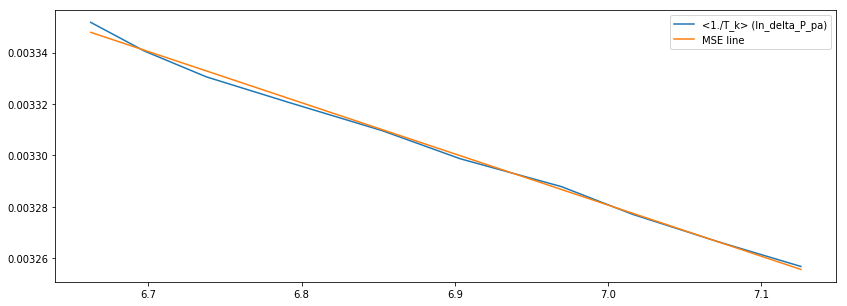

In [136]:

a, b, sigma_a, sigma_b = eval_mnk(data_frame["ln_delta_P_pa"].values, 1./ data_frame["T_K"].values)

plt.figure(figsize=(14, 5))
plt.plot(data_frame["ln_delta_P_pa"].values, 1./ data_frame["T_K"].values, label="<1./T_k> (ln_delta_P_pa)")
grid = np.array([(data_frame["ln_delta_P_pa"].values).min(), (data_frame["ln_delta_P_pa"].values).max()]) 
plt.plot(grid, grid * b + a, label="MSE line")
plt.legend()
plt.show()


In [137]:
1./b, 1./a

(-5020.9518040832536, 213.91153350171479)

In [138]:
L = - 8.31 * 1./b
print("L = ", L)

print("Расхождение = ", abs(42320 - L) / 42320)

L =  41724.1094919
Расхождение =  0.0140805885649
